In [2]:
!pip install scikit-optimize


  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/65/cd/15c9ebea645cc9860aa71fe0474f4be981f10ed8e19e1fb0ef1027d4966e/scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/a8/ee/a878f2ad010cbccb311f947f0f2f09d38f613938ee28c34e60fceecc75a1/pyaml-25.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   ------------------ -------------------- 51.2/107.8 kB 890.4 kB/s eta 0:00:01
   ---------------------------------------- 107.8/107.8 kB 1.0 MB/s eta 0:00:00


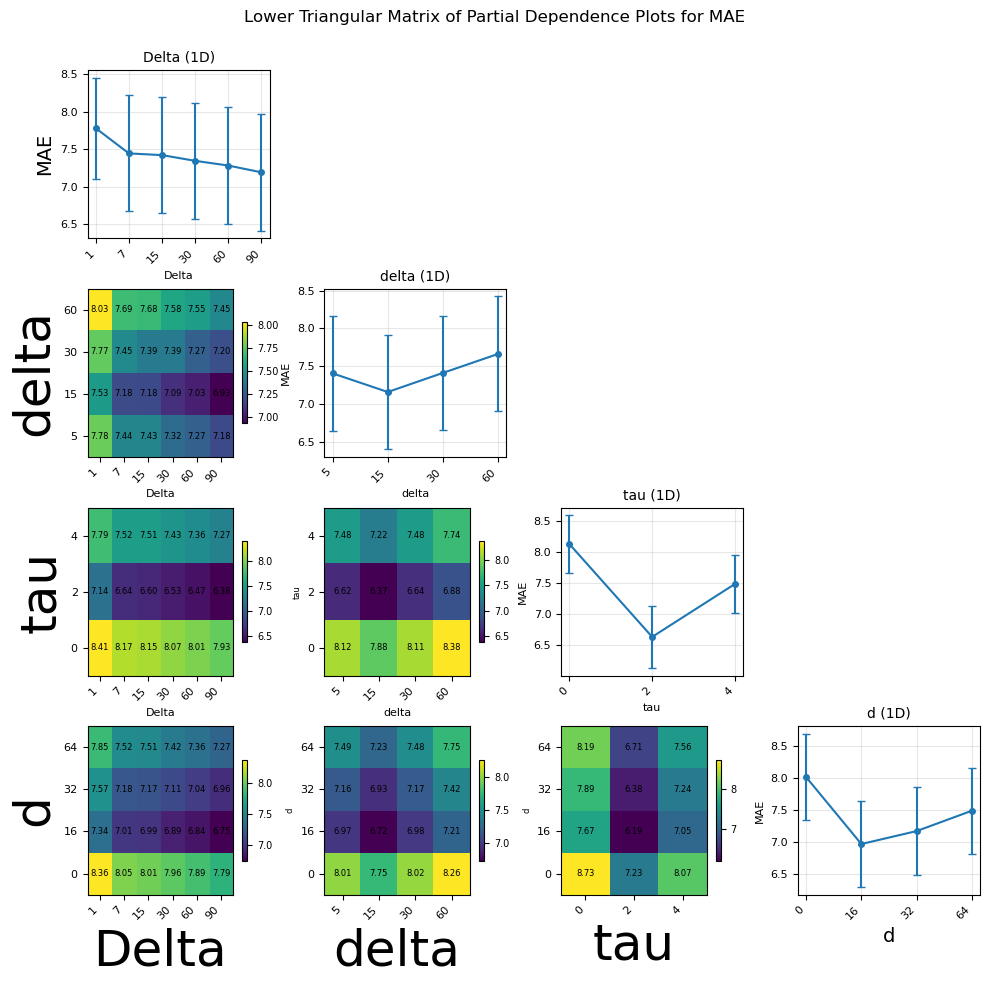

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the MAE data from the table (as in previous examples)
mae_data = [
    # Delta = 1 day
    [
        [9.041, 7.945, 8.179, 8.427, 7.767, 6.746, 6.991, 7.207, 8.327, 7.390, 7.555, 7.839],  # 5 min
        [8.768, 7.718, 7.970, 8.288, 7.431, 6.453, 6.681, 6.904, 8.105, 7.063, 7.291, 7.694],  # 15 min
        [8.923, 7.934, 8.249, 8.434, 7.787, 6.745, 6.867, 7.214, 8.344, 7.303, 7.529, 7.869],  # 30 min
        [9.232, 8.226, 8.417, 8.752, 7.968, 6.922, 7.196, 7.404, 8.674, 7.610, 7.855, 8.130],  # 60 min
    ],
    # Delta = 7 days
    [
        [8.774, 7.730, 7.966, 8.270, 7.266, 6.183, 6.304, 6.706, 8.173, 7.018, 7.204, 7.665],
        [8.542, 7.442, 7.655, 7.986, 6.956, 5.936, 6.165, 6.414, 7.838, 6.893, 7.073, 7.314],
        [8.835, 7.770, 7.827, 8.271, 7.297, 6.292, 6.393, 6.773, 8.117, 7.067, 7.287, 7.526],
        [9.033, 7.905, 8.162, 8.563, 7.493, 6.478, 6.607, 6.958, 8.312, 7.398, 7.562, 7.839],
    ],
    # Delta = 15 days
    [
        [8.747, 7.752, 7.953, 8.231, 7.220, 6.112, 6.321, 6.789, 8.129, 7.096, 7.205, 7.635],
        [8.583, 7.431, 7.699, 7.940, 6.909, 5.981, 6.104, 6.475, 7.828, 6.885, 7.025, 7.315],
        [8.710, 7.679, 7.822, 8.217, 7.130, 6.104, 6.328, 6.631, 8.089, 7.076, 7.287, 7.564],
        [9.054, 7.901, 8.110, 8.511, 7.464, 6.479, 6.661, 6.926, 8.302, 7.358, 7.514, 7.871],
    ],
    # Delta = 30 days
    [
        [8.600, 7.627, 7.893, 8.104, 7.124, 6.064, 6.221, 6.611, 8.014, 6.914, 7.134, 7.547],
        [8.494, 7.315, 7.551, 7.851, 6.872, 5.814, 6.039, 6.389, 7.736, 6.719, 6.995, 7.254],
        [8.788, 7.647, 7.819, 8.182, 7.133, 6.139, 6.397, 6.616, 8.077, 7.095, 7.243, 7.515],
        [8.957, 7.806, 8.094, 8.404, 7.389, 6.347, 6.502, 6.828, 8.279, 7.232, 7.401, 7.716],
    ],
    # Delta = 60 days
    [
        [8.631, 7.532, 7.729, 8.025, 7.005, 6.095, 6.221, 6.503, 7.945, 6.974, 7.139, 7.473],
        [8.313, 7.385, 7.593, 7.840, 6.877, 5.776, 5.912, 6.363, 7.712, 6.601, 6.854, 7.151],
        [8.675, 7.524, 7.731, 8.001, 7.072, 6.007, 6.295, 6.549, 7.919, 6.963, 7.111, 7.417],
        [8.867, 7.835, 8.068, 8.395, 7.348, 6.266, 6.419, 6.848, 8.268, 7.133, 7.397, 7.718],
    ],
    # Delta = 90 days
    [
        [8.543, 7.474, 7.662, 7.939, 6.970, 5.913, 6.128, 6.463, 7.876, 6.824, 7.059, 7.310],
        [8.249, 7.299, 7.487, 7.724, 6.710, 5.687, 5.840, 6.242, 7.620, 6.539, 6.781, 7.028],
        [8.451, 7.524, 7.738, 7.999, 7.098, 5.882, 6.092, 6.503, 7.881, 6.854, 7.054, 7.327],
        [8.722, 7.760, 7.978, 8.260, 7.268, 6.125, 6.392, 6.713, 8.122, 7.076, 7.265, 7.674],
    ]
]

# Labels
delta_list = [1,7,15,30,60,90]#['day1 ', '7 days', '15 days', '30 days', '60 days', '90 days']
dd_list = [5,15,30,60]#['5 min', '15 min', '30 min', '60 min']
tau_list = [0, 2, 4]
d_list = [0, 16, 32, 64]

# Flatten the data into lists
mae_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_dd, dd in enumerate(dd_list):
        row_mae = mae_data[i_delta][i_dd]
        for i_tau, tau in enumerate(tau_list):
            start = i_tau * 4
            for i_d, d in enumerate(d_list):
                mae_values.append(row_mae[start + i_d])
                index_tuples.append((delta, dd, tau, d))

# Create DataFrame
df = pd.DataFrame({
    'Delta': [t[0] for t in index_tuples],
    'delta': [t[1] for t in index_tuples],
    'tau': [t[2] for t in index_tuples],
    'd': [t[3] for t in index_tuples],
    'MAE': mae_values
})

# Hyperparameters order for the matrix
hyperparams = ['Delta', 'delta', 'tau', 'd']
n_params = len(hyperparams)

# Create the figure with subplots (4x4 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for MAE', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (MAE vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['MAE'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('MAE', fontsize=14)
            else:
                ax.set_ylabel('MAE', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (MAE for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='MAE', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.2f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_mae_gdrndft1.png')
plt.show()

In [9]:
import os

In [10]:
os.getcwd()

'C:\\Users\\prath'

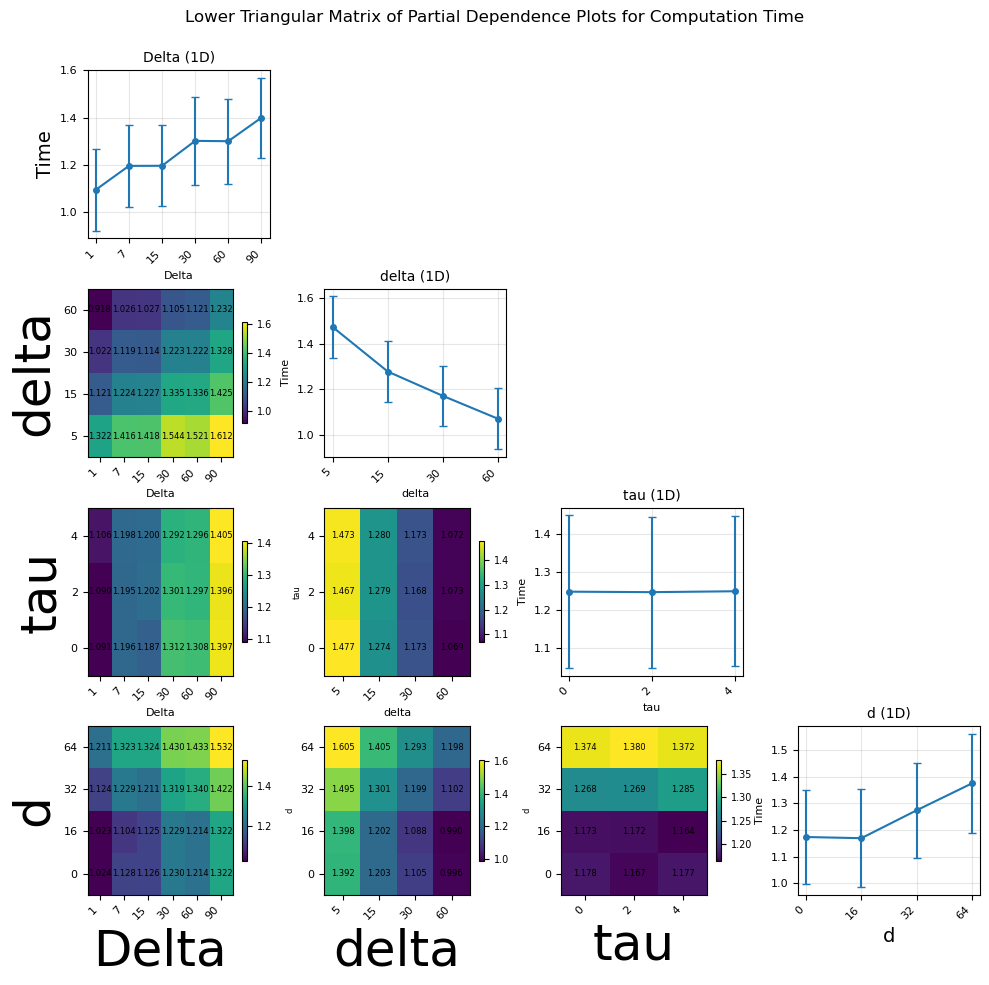

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Computation Time data from the table (lower values)
time_data = [
    # Delta = 1 day
    [
        [1.280, 1.260, 1.345, 1.409, 1.249, 1.223, 1.351, 1.406, 1.265, 1.249, 1.376, 1.449],  # 5 min
        [1.046, 1.007, 1.146, 1.208, 1.050, 1.067, 1.109, 1.293, 1.039, 1.089, 1.116, 1.280],  # 15 min
        [0.929, 0.997, 1.092, 1.118, 0.955, 0.921, 1.067, 1.105, 0.949, 0.978, 1.045, 1.105],  # 30 min
        [0.849, 0.806, 0.927, 1.030, 0.817, 0.820, 0.912, 1.093, 0.863, 0.864, 0.998, 1.032],  # 60 min
    ],
    # Delta = 7 days
    [
        [1.305, 1.358, 1.403, 1.573, 1.300, 1.305, 1.446, 1.585, 1.366, 1.335, 1.424, 1.594],
        [1.191, 1.113, 1.258, 1.366, 1.134, 1.149, 1.208, 1.340, 1.157, 1.140, 1.293, 1.334],
        [1.097, 1.003, 1.177, 1.216, 1.086, 1.031, 1.125, 1.275, 1.006, 1.038, 1.161, 1.215],
        [0.945, 0.904, 1.095, 1.126, 0.979, 0.952, 1.068, 1.142, 0.970, 0.923, 1.094, 1.111],
    ],
    # Delta = 15 days
    [
        [1.380, 1.341, 1.400, 1.523, 1.349, 1.374, 1.428, 1.564, 1.354, 1.306, 1.459, 1.541],
        [1.124, 1.133, 1.293, 1.363, 1.148, 1.166, 1.240, 1.357, 1.187, 1.144, 1.224, 1.340],
        [1.036, 1.038, 1.128, 1.205, 1.026, 1.063, 1.103, 1.260, 1.064, 1.040, 1.166, 1.240],
        [0.907, 0.975, 1.003, 1.144, 0.973, 0.986, 1.006, 1.195, 0.967, 0.935, 1.085, 1.153],
    ],
    # Delta = 30 days
    [
        [1.475, 1.496, 1.547, 1.685, 1.433, 1.491, 1.574, 1.695, 1.476, 1.455, 1.580, 1.625],
        [1.267, 1.290, 1.328, 1.480, 1.288, 1.265, 1.353, 1.459, 1.262, 1.223, 1.348, 1.455],
        [1.168, 1.145, 1.204, 1.362, 1.174, 1.104, 1.275, 1.334, 1.105, 1.168, 1.242, 1.395],
        [1.085, 1.064, 1.146, 1.252, 1.000, 1.046, 1.120, 1.211, 1.021, 1.000, 1.108, 1.203],
    ],
    # Delta = 60 days
    [
        [1.403, 1.488, 1.534, 1.697, 1.400, 1.426, 1.577, 1.693, 1.416, 1.421, 1.581, 1.622],
        [1.249, 1.244, 1.372, 1.481, 1.249, 1.283, 1.357, 1.452, 1.254, 1.256, 1.376, 1.462],
        [1.198, 1.154, 1.247, 1.368, 1.143, 1.112, 1.227, 1.361, 1.128, 1.102, 1.294, 1.336],
        [1.059, 1.024, 1.183, 1.225, 1.006, 1.050, 1.168, 1.252, 1.062, 1.006, 1.170, 1.244],
    ],
    # Delta = 90 days
    [
        [1.566, 1.590, 1.628, 1.771, 1.518, 1.502, 1.612, 1.714, 1.522, 1.546, 1.643, 1.737],
        [1.312, 1.363, 1.431, 1.519, 1.335, 1.388, 1.483, 1.532, 1.359, 1.310, 1.490, 1.575],
        [1.273, 1.223, 1.306, 1.468, 1.267, 1.215, 1.389, 1.417, 1.293, 1.256, 1.332, 1.496],
        [1.134, 1.128, 1.249, 1.386, 1.133, 1.191, 1.257, 1.383, 1.155, 1.151, 1.239, 1.380],
    ]
]

# Labels
delta_list = [1,7,15,30,60,90]
dd_list = [5,15,30,60]
tau_list = [0, 2, 4]
d_list = [0, 16, 32, 64]

# Flatten the data into lists
time_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_dd, dd in enumerate(dd_list):
        row_time = time_data[i_delta][i_dd]
        for i_tau, tau in enumerate(tau_list):
            start = i_tau * 4
            for i_d, d in enumerate(d_list):
                time_values.append(row_time[start + i_d])
                index_tuples.append((delta, dd, tau, d))

# Create DataFrame
df = pd.DataFrame({
    'Delta': [t[0] for t in index_tuples],
    'delta': [t[1] for t in index_tuples],
    'tau': [t[2] for t in index_tuples],
    'd': [t[3] for t in index_tuples],
    'Time': time_values
})

# Hyperparameters order for the matrix
hyperparams = ['Delta', 'delta', 'tau', 'd']
n_params = len(hyperparams)

# Create the figure with subplots (4x4 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for Computation Time', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (Time vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['Time'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('Time', fontsize=14)
            else:
                ax.set_ylabel('Time', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (Time for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='Time', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.3f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_time_gdrndft1.png')
plt.show()

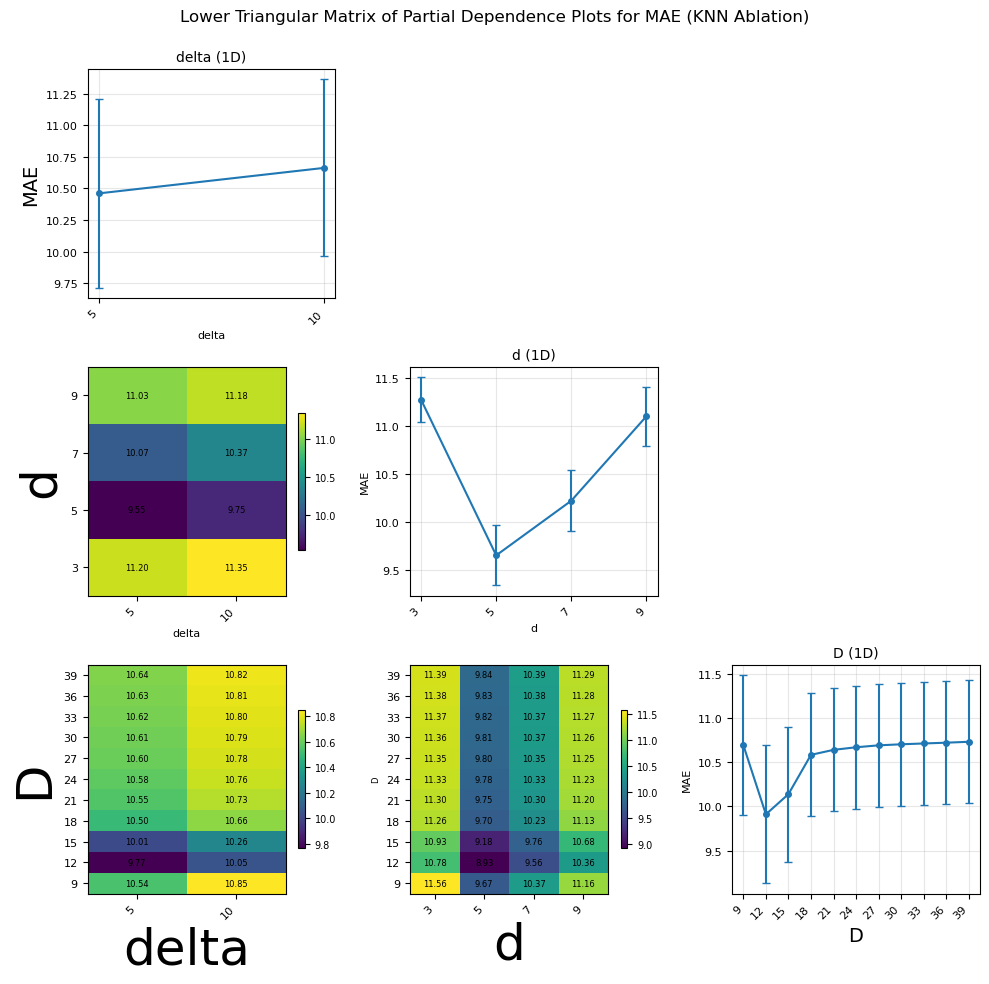

In [40]:
#knn mae
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the MAE data from the table (upper values)
mae_data = [
    # delta = 5
    [
        [11.402, 10.623, 10.812, 11.237, 11.254, 11.276, 11.301, 11.314, 11.326, 11.332, 11.344],  # d=3
        [9.524, 8.842, 9.091, 9.603, 9.652, 9.678, 9.702, 9.715, 9.723, 9.731, 9.744],  # d=5
        [10.217, 9.401, 9.613, 10.086, 10.152, 10.184, 10.204, 10.215, 10.223, 10.234, 10.241],  # d=7
        [11.008, 10.217, 10.536, 11.078, 11.151, 11.182, 11.203, 11.214, 11.223, 11.231, 11.244],  # d=9
    ],
    # delta = 10
    [
        [11.724, 10.937, 11.045, 11.289, 11.351, 11.382, 11.401, 11.412, 11.423, 11.433, 11.441],  # d=3
        [9.824, 9.021, 9.276, 9.803, 9.852, 9.881, 9.902, 9.915, 9.924, 9.931, 9.944],  # d=5
        [10.526, 9.724, 9.903, 10.381, 10.447, 10.478, 10.504, 10.515, 10.523, 10.534, 10.542],  # d=7
        [11.308, 10.512, 10.826, 11.182, 11.251, 11.283, 11.302, 11.314, 11.323, 11.332, 11.341],  # d=9
    ]
]

# Labels
delta_list = [5, 10]
d_list = [3, 5, 7, 9]
D_list = [9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39]

# Flatten the data into lists
mae_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_d, d in enumerate(d_list):
        row_mae = mae_data[i_delta][i_d]
        for i_D, D in enumerate(D_list):
            mae_values.append(row_mae[i_D])
            index_tuples.append((delta, d, D))

# Create DataFrame
df = pd.DataFrame({
    'delta': [t[0] for t in index_tuples],
    'd': [t[1] for t in index_tuples],
    'D': [t[2] for t in index_tuples],
    'MAE': mae_values
})

# Hyperparameters order for the matrix
hyperparams = ['delta', 'd', 'D']
n_params = len(hyperparams)

# Create the figure with subplots (3x3 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for MAE (KNN Ablation)', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (MAE vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['MAE'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('MAE', fontsize=14)
            else:
                ax.set_ylabel('MAE', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (MAE for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='MAE', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.2f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_mae_knn.png')
plt.show()

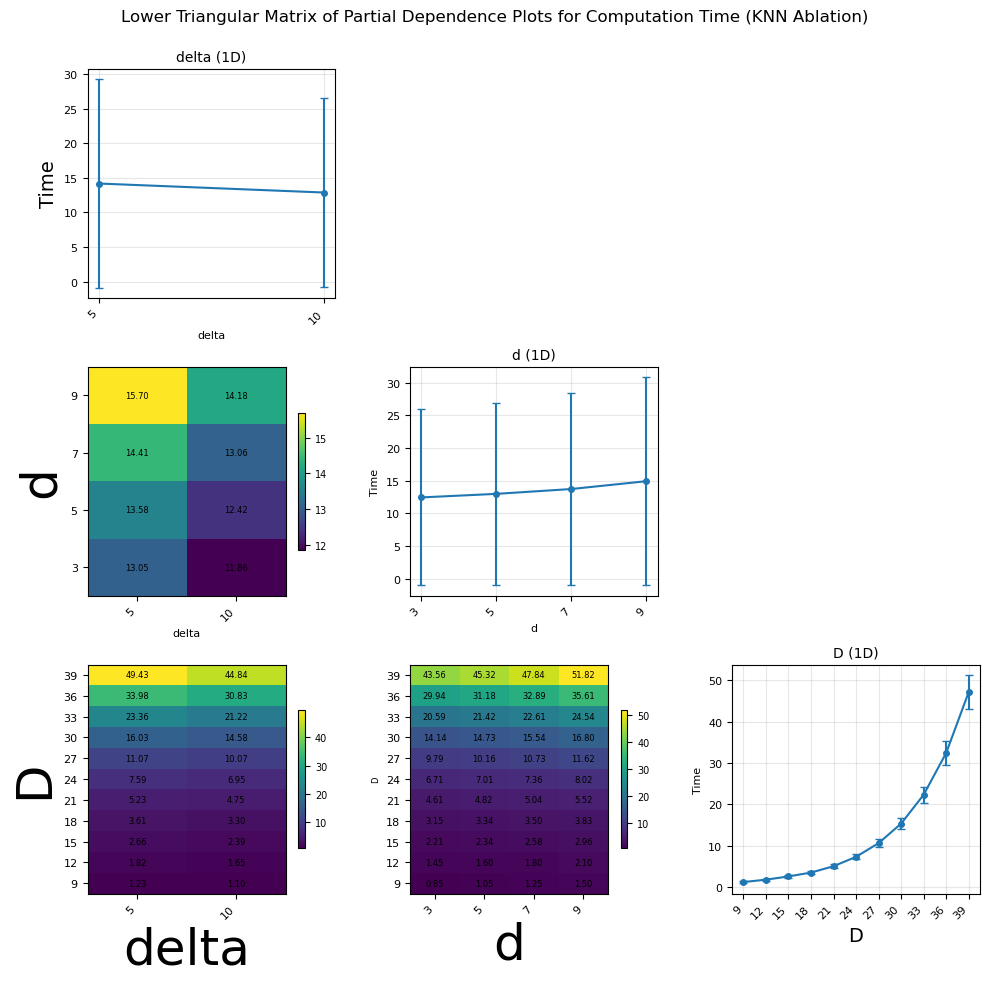

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Computation Time data from the table (lower values)
time_data = [
    # delta = 5
    [
        [0.9, 1.5, 2.31, 3.28, 4.84, 7.0, 10.24, 14.75, 21.61, 31.36, 45.74],  # d=3
        [1.1, 1.7, 2.47, 3.46, 5.01, 7.28, 10.61, 15.39, 22.38, 32.62, 47.32],  # d=5
        [1.3, 1.9, 2.74, 3.69, 5.25, 7.68, 11.22, 16.31, 23.71, 34.52, 50.23],  # d=7
        [1.6, 2.2, 3.11, 4.02, 5.84, 8.42, 12.23, 17.66, 25.74, 37.42, 54.43],  # d=9
    ],
    # delta = 10
    [
        [0.8, 1.4, 2.12, 3.02, 4.37, 6.41, 9.34, 13.53, 19.56, 28.52, 41.39],  # d=3
        [1.0, 1.5, 2.21, 3.22, 4.63, 6.74, 9.71, 14.06, 20.47, 29.75, 43.32],  # d=5
        [1.2, 1.7, 2.42, 3.31, 4.82, 7.03, 10.23, 14.77, 21.51, 31.26, 45.46],  # d=7
        [1.4, 2.0, 2.82, 3.64, 5.19, 7.61, 11.01, 15.95, 23.34, 33.79, 49.21],  # d=9
    ]
]

# Labels
delta_list = [5, 10]
d_list = [3, 5, 7, 9]
D_list = [9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39]

# Flatten the data into lists
time_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_d, d in enumerate(d_list):
        row_time = time_data[i_delta][i_d]
        for i_D, D in enumerate(D_list):
            time_values.append(row_time[i_D])
            index_tuples.append((delta, d, D))

# Create DataFrame
df = pd.DataFrame({
    'delta': [t[0] for t in index_tuples],
    'd': [t[1] for t in index_tuples],
    'D': [t[2] for t in index_tuples],
    'Time': time_values
})

# Hyperparameters order for the matrix
hyperparams = ['delta', 'd', 'D']
n_params = len(hyperparams)

# Create the figure with subplots (3x3 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for Computation Time (KNN Ablation)', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (Time vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['Time'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('Time', fontsize=14)
            else:
                ax.set_ylabel('Time', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (Time for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='Time', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.2f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_time_knn.png')
plt.show()

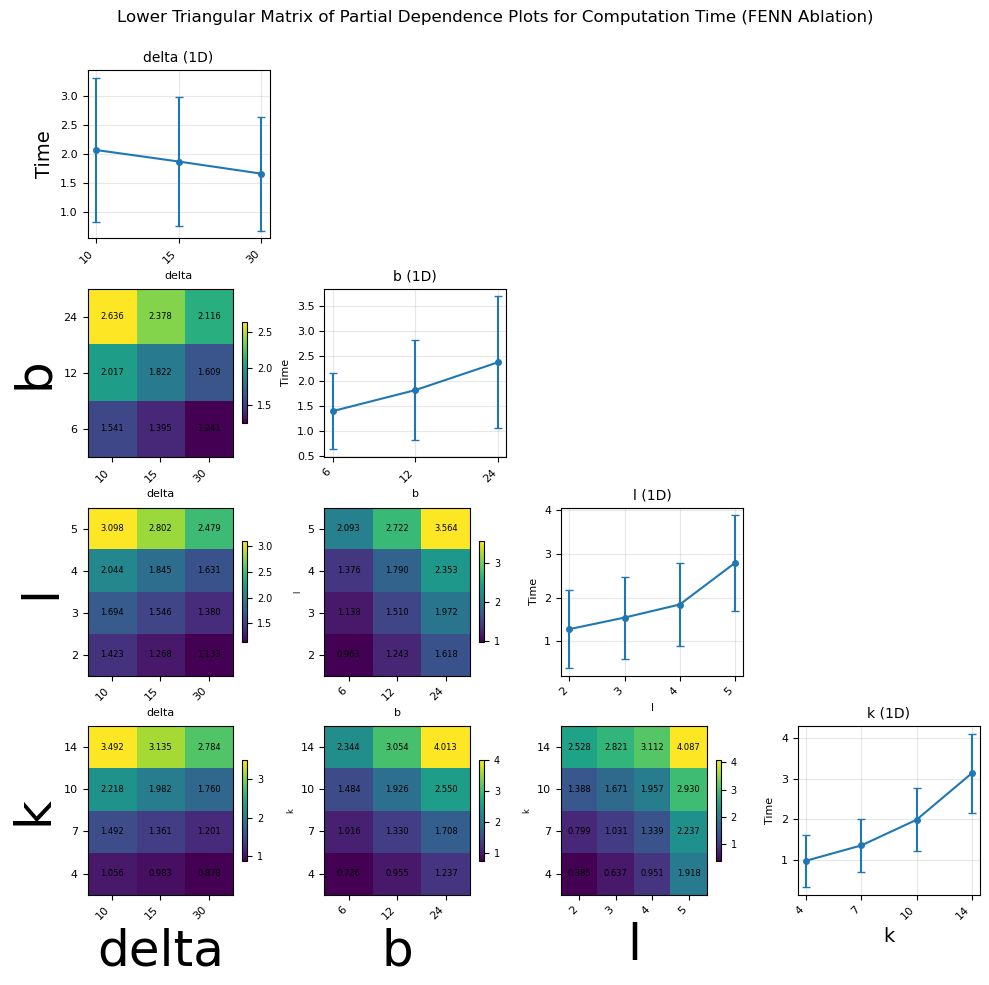

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Computation Time data from the table (lower values)
time_data = [
    # delta=10
    [
        [0.318, 0.696, 1.204, 2.103, 0.497, 0.791, 1.409, 2.291, 0.819, 1.082, 1.601, 2.585, 1.582, 1.9, 2.392, 3.388],  # b=6
        [0.371, 0.95, 1.524, 2.733, 0.644, 1.075, 1.846, 3.03, 1.034, 1.46, 2.055, 3.414, 2.123, 2.43, 3.146, 4.436],  # b=12
        [0.434, 1.105, 2.042, 3.591, 0.909, 1.367, 2.467, 3.996, 1.307, 1.899, 2.817, 4.46, 2.64, 3.153, 4.113, 5.876],  # b=24
    ],
    # delta=15
    [
        [0.315, 0.6, 1.002, 1.901, 0.502, 0.801, 1.196, 2.087, 0.701, 1.003, 1.509, 2.303, 1.404, 1.716, 2.195, 3.09],  # b=6
        [0.387, 0.828, 1.317, 2.429, 0.696, 1.072, 1.592, 2.751, 0.934, 1.291, 1.973, 2.983, 1.865, 2.179, 2.827, 4.035],  # b=12
        [0.48, 0.969, 1.701, 3.292, 0.78, 1.311, 2.109, 3.651, 1.279, 1.757, 2.583, 3.821, 2.459, 2.804, 3.781, 5.275],  # b=24
    ],
    # delta=30
    [
        [0.298, 0.506, 0.902, 1.709, 0.397, 0.701, 1.106, 1.883, 0.6, 0.907, 1.298, 2.106, 1.282, 1.491, 1.995, 2.682],  # b=6
        [0.384, 0.616, 1.207, 2.17, 0.564, 0.955, 1.421, 2.469, 0.817, 1.161, 1.647, 2.715, 1.64, 1.941, 2.555, 3.485],  # b=12
        [0.475, 0.92, 1.589, 2.82, 0.742, 1.209, 1.891, 3.228, 1.071, 1.489, 2.134, 3.623, 2.265, 2.518, 3.369, 4.52],  # b=24
    ]
]

# Labels
delta_list = [10, 15, 30]
b_list = [6, 12, 24]
l_list = [2, 3, 4, 5]
k_list = [4, 7, 10, 14]

# Flatten the data into lists
time_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_b, b in enumerate(b_list):
        row_time = time_data[i_delta][i_b]
        for i_l, l in enumerate(l_list):
            start = i_l * 4
            for i_k, k in enumerate(k_list):
                time_values.append(row_time[start + i_k])
                index_tuples.append((delta, b, l, k))

# Create DataFrame
df = pd.DataFrame({
    'delta': [t[0] for t in index_tuples],
    'b': [t[1] for t in index_tuples],
    'l': [t[2] for t in index_tuples],
    'k': [t[3] for t in index_tuples],
    'Time': time_values
})

# Hyperparameters order for the matrix
hyperparams = ['delta', 'b', 'l', 'k']
n_params = len(hyperparams)

# Create the figure with subplots (4x4 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for Computation Time (FENN Ablation)', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (Time vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['Time'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('Time', fontsize=14)
            else:
                ax.set_ylabel('Time', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (Time for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='Time', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.3f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_time_fenn.png')
plt.show()

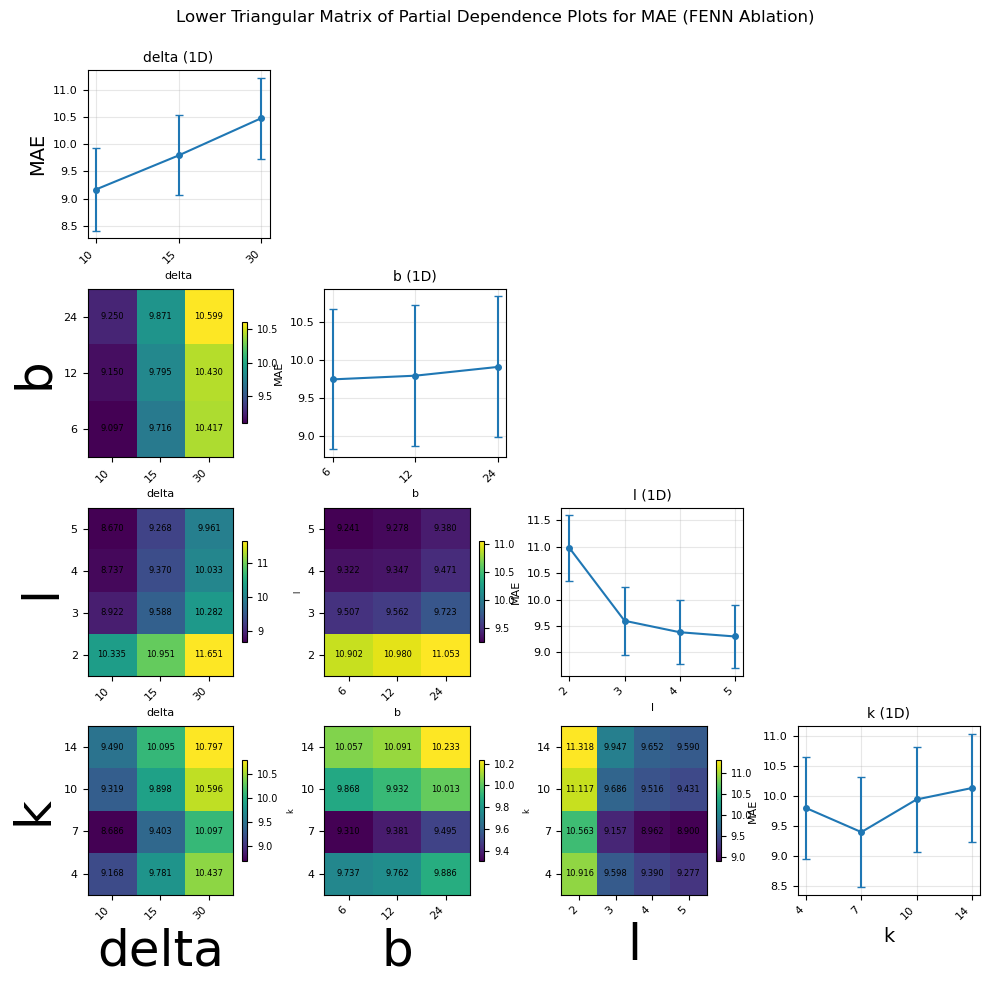

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the MAE data from the table (upper values)
mae_data = [
    # delta=10
    [
        [10.246, 9.842, 10.367, 10.592, 8.92, 8.271, 9.011, 9.214, 8.716, 8.212, 8.831, 8.956, 8.617, 8.125, 8.738, 8.886],  # b=6
        [10.247, 9.859, 10.578, 10.68, 8.891, 8.369, 9.091, 9.232, 8.746, 8.294, 8.798, 8.903, 8.73, 8.266, 8.801, 8.915],  # b=12
        [10.275, 9.961, 10.528, 10.84, 9.038, 8.331, 9.225, 9.467, 8.928, 8.37, 9.002, 9.084, 8.657, 8.337, 8.852, 9.111],  # b=24
    ],
    # delta=15
    [
        [10.824, 10.454, 10.986, 11.223, 9.48, 9.05, 9.595, 9.823, 9.27, 8.886, 9.438, 9.56, 9.185, 8.847, 9.296, 9.536],  # b=6
        [10.983, 10.478, 11.191, 11.298, 9.534, 9.189, 9.557, 9.872, 9.326, 9.054, 9.479, 9.741, 9.287, 8.88, 9.435, 9.415],  # b=12
        [10.93, 10.653, 11.064, 11.326, 9.787, 9.397, 9.674, 10.092, 9.431, 8.975, 9.596, 9.686, 9.332, 8.971, 9.464, 9.562],  # b=24
    ],
    # delta=30
    [
        [11.48, 11.218, 11.69, 11.907, 10.153, 9.786, 10.312, 10.467, 10.022, 9.567, 10.115, 10.288, 9.929, 9.465, 10.032, 10.236],  # b=6
        [11.539, 11.26, 11.818, 11.833, 10.136, 9.925, 10.264, 10.68, 9.908, 9.556, 10.098, 10.256, 9.819, 9.442, 10.073, 10.269],  # b=12
        [11.721, 11.34, 11.835, 12.167, 10.439, 10.098, 10.447, 10.678, 10.159, 9.745, 10.284, 10.396, 9.935, 9.765, 10.186, 10.384],  # b=24
    ]
]

# Labels
delta_list = [10, 15, 30]
b_list = [6, 12, 24]
l_list = [2, 3, 4, 5]
k_list = [4, 7, 10, 14]

# Flatten the data into lists
mae_values = []
index_tuples = []

for i_delta, delta in enumerate(delta_list):
    for i_b, b in enumerate(b_list):
        row_mae = mae_data[i_delta][i_b]
        for i_l, l in enumerate(l_list):
            start = i_l * 4
            for i_k, k in enumerate(k_list):
                mae_values.append(row_mae[start + i_k])
                index_tuples.append((delta, b, l, k))

# Create DataFrame
df = pd.DataFrame({
    'delta': [t[0] for t in index_tuples],
    'b': [t[1] for t in index_tuples],
    'l': [t[2] for t in index_tuples],
    'k': [t[3] for t in index_tuples],
    'MAE': mae_values
})

# Hyperparameters order for the matrix
hyperparams = ['delta', 'b', 'l', 'k']
n_params = len(hyperparams)

# Create the figure with subplots (4x4 grid) - smaller figsize
fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for MAE (FENN Ablation)', fontsize=12)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (MAE vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['MAE'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=3, linewidth=1.5, markersize=4)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=8)
            if j == 0:
                ax.set_ylabel('MAE', fontsize=14)
            else:
                ax.set_ylabel('MAE', fontsize=8)
            if i == n_params - 1:
                ax.set_xlabel(row_param, fontsize=14)
            else:
                ax.set_xlabel(row_param, fontsize=8)
            ax.set_title(f'{row_param} (1D)', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.tick_params(labelsize=8)
        else:
            # Off-diagonal: 2D heatmap (MAE for y=row_param vs x=col_param, avg over others)
            pivot = df.pivot_table(values='MAE', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=8)
            if j == 0:
                ax.set_ylabel(row_param, fontsize=36)
            else:
                ax.set_ylabel(row_param, fontsize=6)
            if i == n_params - 1:
                ax.set_xlabel(col_param, fontsize=36)
            else:
                ax.set_xlabel(col_param, fontsize=8)
            ax.set_title('', fontsize=19)
            ax.tick_params(labelsize=8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            cbar.ax.set_ylabel('', rotation=-90, va='bottom', fontsize=18)
            cbar.ax.tick_params(labelsize=7)
            
            # Optional: add value annotations - smaller font
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.3f}', ha='center', va='center', fontsize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)
plt.savefig('interdependenceplot_mae_fenn.png')
plt.show()

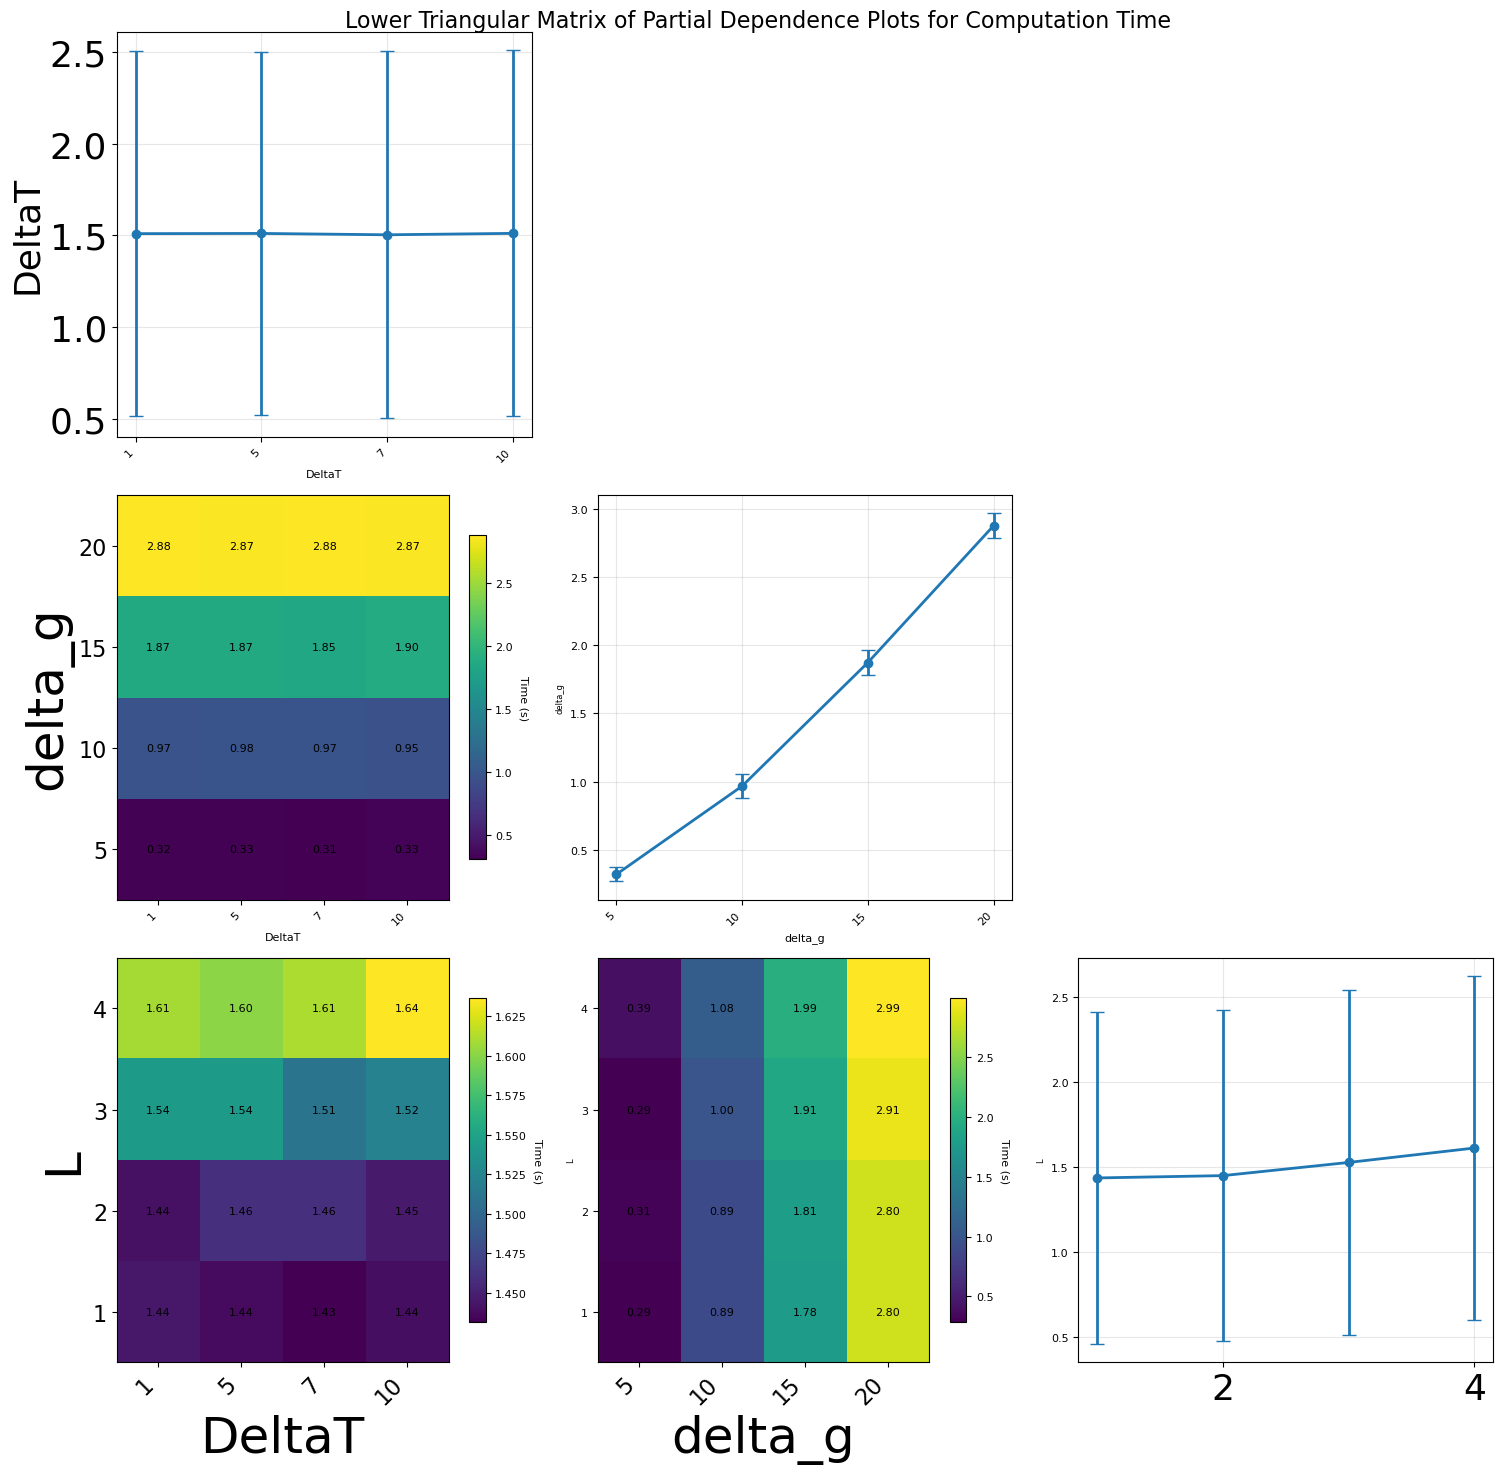

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Time data from the table
# Structured as time_data[deltaT_index][L_index] = list of 4 delta_g values
time_data = [
    # DeltaT = 1
    [
        [0.271, 0.9, 1.8, 2.808],  # L=1
        [0.305, 0.908, 1.78, 2.77],  # L=2
        [0.295, 1.009, 1.93, 2.937],  # L=3
        [0.406, 1.059, 1.98, 2.99],  # L=4
    ],
    # DeltaT = 5
    [
        [0.271, 0.94, 1.78, 2.76],  # L=1
        [0.33, 0.88, 1.792, 2.839],  # L=2
        [0.33, 0.988, 1.943, 2.91],  # L=3
        [0.37, 1.101, 1.963, 2.97],  # L=4
    ],
    # DeltaT = 7
    [
        [0.292, 0.85, 1.76, 2.824],  # L=1
        [0.29, 0.91, 1.81, 2.83],  # L=2
        [0.28, 1.039, 1.861, 2.86],  # L=3
        [0.361, 1.1, 1.971, 3.011],  # L=4
    ],
    # DeltaT = 10
    [
        [0.31, 0.889, 1.766, 2.79],  # L=1
        [0.33, 0.86, 1.845, 2.75],  # L=2
        [0.253, 0.979, 1.92, 2.936],  # L=3
        [0.431, 1.06, 2.05, 3.004],  # L=4
    ]
]

# Labels
deltaT_list = [1,5,7,10]
delta_g_list = [5,10,15,20]
L_list = [1, 2, 3, 4]

# Flatten the data into lists
time_values = []
index_tuples = []

for i_deltaT, deltaT in enumerate(deltaT_list):
    for i_L, L in enumerate(L_list):
        row_time = time_data[i_deltaT][i_L]
        for i_delta_g, delta_g in enumerate(delta_g_list):
            time_values.append(row_time[i_delta_g])
            index_tuples.append((deltaT, delta_g, L))

# Create DataFrame
df = pd.DataFrame({
    'DeltaT': [t[0] for t in index_tuples],
    'delta_g': [t[1] for t in index_tuples],
    'L': [t[2] for t in index_tuples],
    'Time': time_values
})

# Hyperparameters order for the matrix
hyperparams = ['DeltaT', 'delta_g', 'L']
n_params = len(hyperparams)

# Create the figure with subplots (3x3 grid)
fig, axes = plt.subplots(n_params, n_params, figsize=(15, 15))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for Computation Time', fontsize=16)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (Time vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['Time'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            if row_param == 'L':
                # For numeric L, use actual values
                x_pos = grouped.index.astype(float)
                ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=5, linewidth=2, markersize=6)
            else:
                # Categorical
                ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=5, linewidth=2, markersize=6)
                ax.set_xticks(x_pos)
                ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=26 if i == n_params - 1 else 8)
                ax.set_xlabel(col_param, fontsize=26 if i == n_params - 1 else 8)
            ax.set_ylabel(row_param, fontsize=26 if j == 0 else 6)
            ax.set_title('', fontsize=19)
            ax.tick_params(axis='y', labelsize=26 if j == 0 else 8)
            ax.tick_params(axis='x', labelsize=26 if i == n_params - 1 else 8)
            ax.grid(True, alpha=0.3)
        else:
            # Off-diagonal: 2D heatmap (Time for y=row_param vs x=col_param, avg over others)
            # The third param is the one not row or col
            third_param = [p for p in hyperparams if p not in [row_param, col_param]][0]
            # Group by row_param, col_param, mean Time (avg over third)
            pivot_data = df.groupby([row_param, col_param])['Time'].mean().reset_index()
            pivot = pivot_data.pivot(index=row_param, columns=col_param, values='Time')
            if pivot.empty:
                pivot = df.pivot_table(values='Time', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=26 if i == n_params - 1 else 8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=36 if j == 0 else 8)
            ax.set_ylabel(row_param, fontsize=36 if j == 0 else 6)
            ax.set_xlabel(col_param, fontsize=36 if i == n_params - 1 else 8)
            ax.set_title('', fontsize=19)
            ax.tick_params(axis='y', labelsize=16 if j == 0 else 8)
            ax.tick_params(axis='x', labelsize=16 if i == n_params - 1 else 8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.8)
            cbar.ax.set_ylabel('Time (s)', rotation=-90, va='bottom', fontsize=8)
            cbar.ax.tick_params(labelsize=8)
            
            # Optional: add value annotations
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    if np.isnan(pivot.values[yi, xi]):
                        continue
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.2f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('interdependenceplot_computation_time_Mgcn.png')
plt.show()

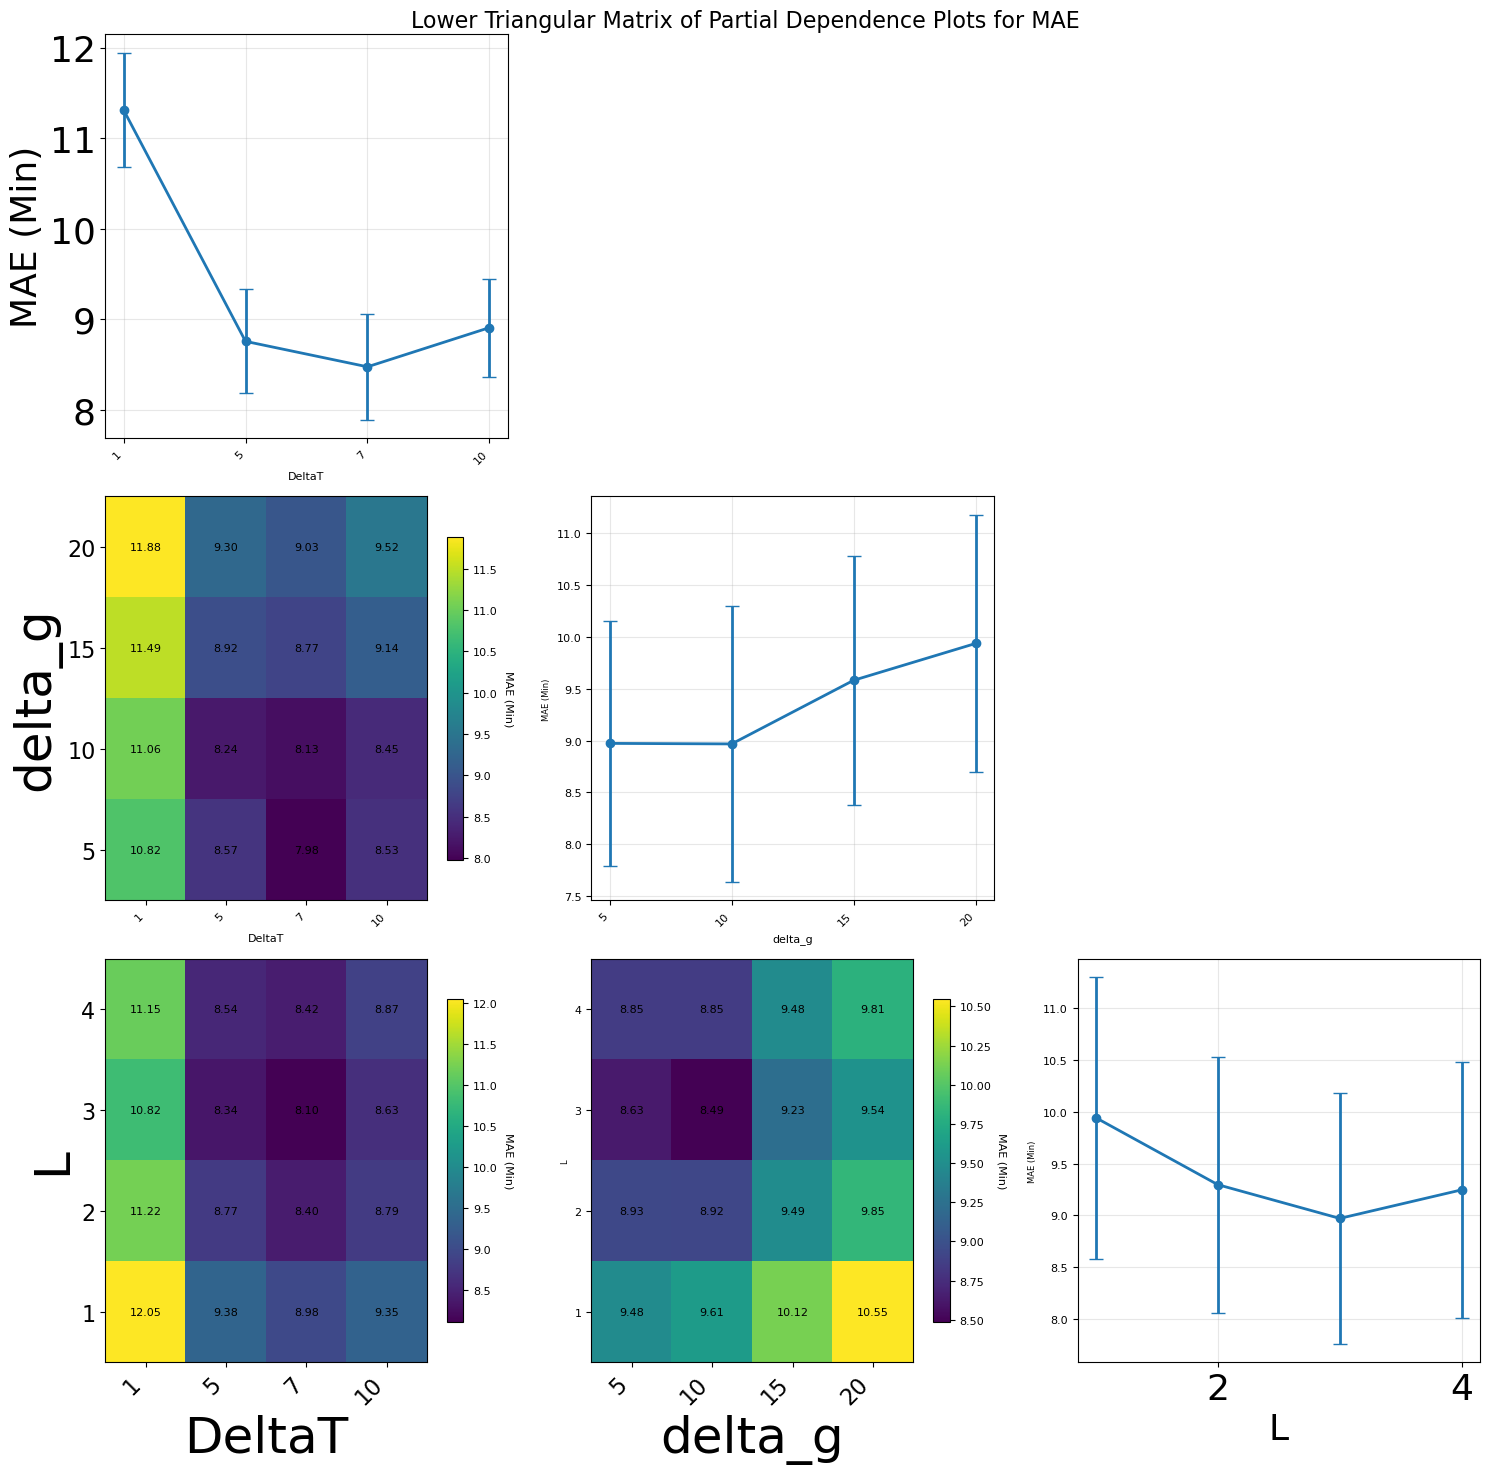

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the MAE data from the table
# Structured as mae_data[deltaT_index][L_index] = list of 4 delta_g values
mae_data = [
    # DeltaT = 1
    [
        [11.5, 11.83, 12.234, 12.65],  # L=1
        [10.769, 10.96, 11.41, 11.75],  # L=2
        [10.332, 10.58, 10.978, 11.39],  # L=3
        [10.665, 10.863, 11.34, 11.75],  # L=4
    ],
    # DeltaT = 5
    [
        [9.195, 8.893, 9.473, 9.949],  # L=1
        [8.633, 8.257, 8.93, 9.276],  # L=2
        [8.144, 7.787, 8.53, 8.89],  # L=3
        [8.308, 8.02, 8.74, 9.1],  # L=4
    ],
    # DeltaT = 7
    [
        [8.2, 8.98, 9.188, 9.558],  # L=1
        [7.86, 8.13, 8.632, 8.991],  # L=2
        [7.83, 7.39, 8.537, 8.65],  # L=3
        [8.02, 8.002, 8.74, 8.92],  # L=4
    ],
    # DeltaT = 10
    [
        [9.03, 8.75, 9.59, 10.03],  # L=1
        [8.456, 8.334, 8.978, 9.38],  # L=2
        [8.22, 8.184, 8.89, 9.22],  # L=3
        [8.4, 8.52, 9.1, 9.464],  # L=4
    ]
]

# Labels
deltaT_list = [1,5,7,10]
delta_g_list = [5,10,15,20]
L_list = [1, 2, 3, 4]

# Flatten the data into lists
mae_values = []
index_tuples = []

for i_deltaT, deltaT in enumerate(deltaT_list):
    for i_L, L in enumerate(L_list):
        row_mae = mae_data[i_deltaT][i_L]
        for i_delta_g, delta_g in enumerate(delta_g_list):
            mae_values.append(row_mae[i_delta_g])
            index_tuples.append((deltaT, delta_g, L))

# Create DataFrame
df = pd.DataFrame({
    'DeltaT': [t[0] for t in index_tuples],
    'delta_g': [t[1] for t in index_tuples],
    'L': [t[2] for t in index_tuples],
    'MAE': mae_values
})

# Hyperparameters order for the matrix
hyperparams = ['DeltaT', 'delta_g', 'L']
n_params = len(hyperparams)

# Create the figure with subplots (3x3 grid)
fig, axes = plt.subplots(n_params, n_params, figsize=(15, 15))
fig.suptitle('Lower Triangular Matrix of Partial Dependence Plots for MAE', fontsize=16)

# For upper triangle, turn off axes
for i in range(n_params):
    for j in range(i + 1, n_params):
        axes[i, j].axis('off')

# For lower triangle and diagonal
for i in range(n_params):  # row
    for j in range(i + 1):  # col (j <= i)
        ax = axes[i, j]
        row_param = hyperparams[i]
        col_param = hyperparams[j]
        
        if i == j:
            # Diagonal: 1D partial dependence plot (MAE vs hyperparam, avg over others)
            grouped = df.groupby(row_param)['MAE'].agg(['mean', 'std'])
            x_pos = np.arange(len(grouped))
            if row_param == 'L':
                # For numeric L, use actual values
                x_pos = grouped.index.astype(float)
                ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=5, linewidth=2, markersize=6)
            else:
                # Categorical
                ax.errorbar(x_pos, grouped['mean'], yerr=grouped['std'], fmt='o-', capsize=5, linewidth=2, markersize=6)
                ax.set_xticks(x_pos)
                ax.set_xticklabels(grouped.index, rotation=45, ha='right', fontsize=26 if i == n_params - 1 else 8)
            ax.set_xlabel(row_param, fontsize=26 if i == n_params - 1 else 8)
            ax.set_ylabel('MAE (Min)', fontsize=26 if j == 0 else 6)
            ax.set_title('', fontsize=19)
            ax.tick_params(axis='y', labelsize=26 if j == 0 else 8)
            ax.tick_params(axis='x', labelsize=26 if i == n_params - 1 else 8)
            ax.grid(True, alpha=0.3)
        else:
            # Off-diagonal: 2D heatmap (MAE for y=row_param vs x=col_param, avg over others)
            # The third param is the one not row or col
            third_param = [p for p in hyperparams if p not in [row_param, col_param]][0]
            # Group by row_param, col_param, mean MAE (avg over third)
            pivot_data = df.groupby([row_param, col_param])['MAE'].mean().reset_index()
            pivot = pivot_data.pivot(index=row_param, columns=col_param, values='MAE')
            if pivot.empty:
                pivot = df.pivot_table(values='MAE', index=row_param, columns=col_param, aggfunc='mean')
            im = ax.imshow(pivot.values, cmap='viridis', aspect='auto', origin='lower')
            ax.set_xticks(np.arange(len(pivot.columns)))
            ax.set_xticklabels(pivot.columns, rotation=45, ha='right', fontsize=26 if i == n_params - 1 else 8)
            ax.set_yticks(np.arange(len(pivot.index)))
            ax.set_yticklabels(pivot.index, fontsize=36 if j == 0 else 8)
            ax.set_xlabel(col_param, fontsize=36 if i == n_params - 1 else 8)
            ax.set_ylabel(row_param, fontsize=36 if j == 0 else 6)
            ax.set_title('', fontsize=19)
            ax.tick_params(axis='y', labelsize=16 if j == 0 else 8)
            ax.tick_params(axis='x', labelsize=16 if i == n_params - 1 else 8)
            
            # Add colorbar
            cbar = fig.colorbar(im, ax=ax, shrink=0.8)
            cbar.ax.set_ylabel('MAE (Min)', rotation=-90, va='bottom', fontsize=8)
            cbar.ax.tick_params(labelsize=8)
            
            # Optional: add value annotations
            for yi in range(len(pivot.index)):
                for xi in range(len(pivot.columns)):
                    if np.isnan(pivot.values[yi, xi]):
                        continue
                    ax.text(xi, yi, f'{pivot.values[yi, xi]:.2f}', ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('interdependenceplot_mae_Mgcn.png')
plt.show()

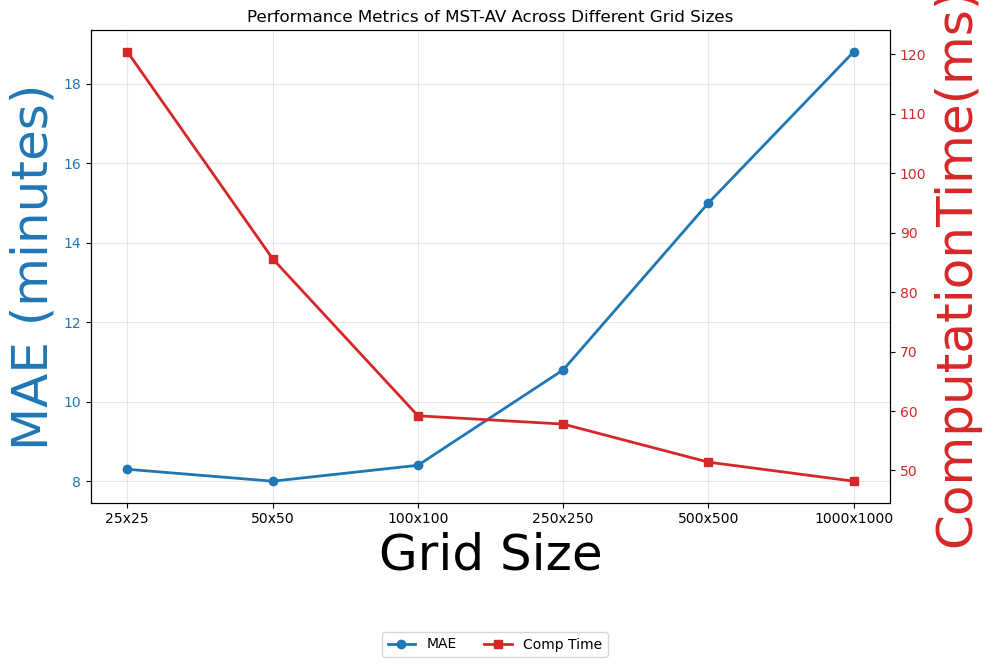

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
grid_sizes = ['25x25', '50x50', '100x100', '250x250', '500x500', '1000x1000']
mae = [8.3, 8.0, 8.4, 10.8, 15.0, 18.8]  # minutes
comp_time = [120.4, 85.6, 59.2, 57.8, 51.4, 48.2]  # ms

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MAE on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Grid Size',fontsize=36)
ax1.set_ylabel('MAE (minutes)',fontsize=36, color=color)
line1 = ax1.plot(grid_sizes, mae, color=color, marker='o', linewidth=2, markersize=6, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for Computation Time
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ComputationTime(ms)',fontsize=36, color=color)
line2 = ax2.plot(grid_sizes, comp_time, color=color, marker='s', linewidth=2, markersize=6, label='Comp Time')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Performance Metrics of MST-AV Across Different Grid Sizes')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.xticks(rotation=45)
plt.savefig('Plot_mst-av')
plt.show()

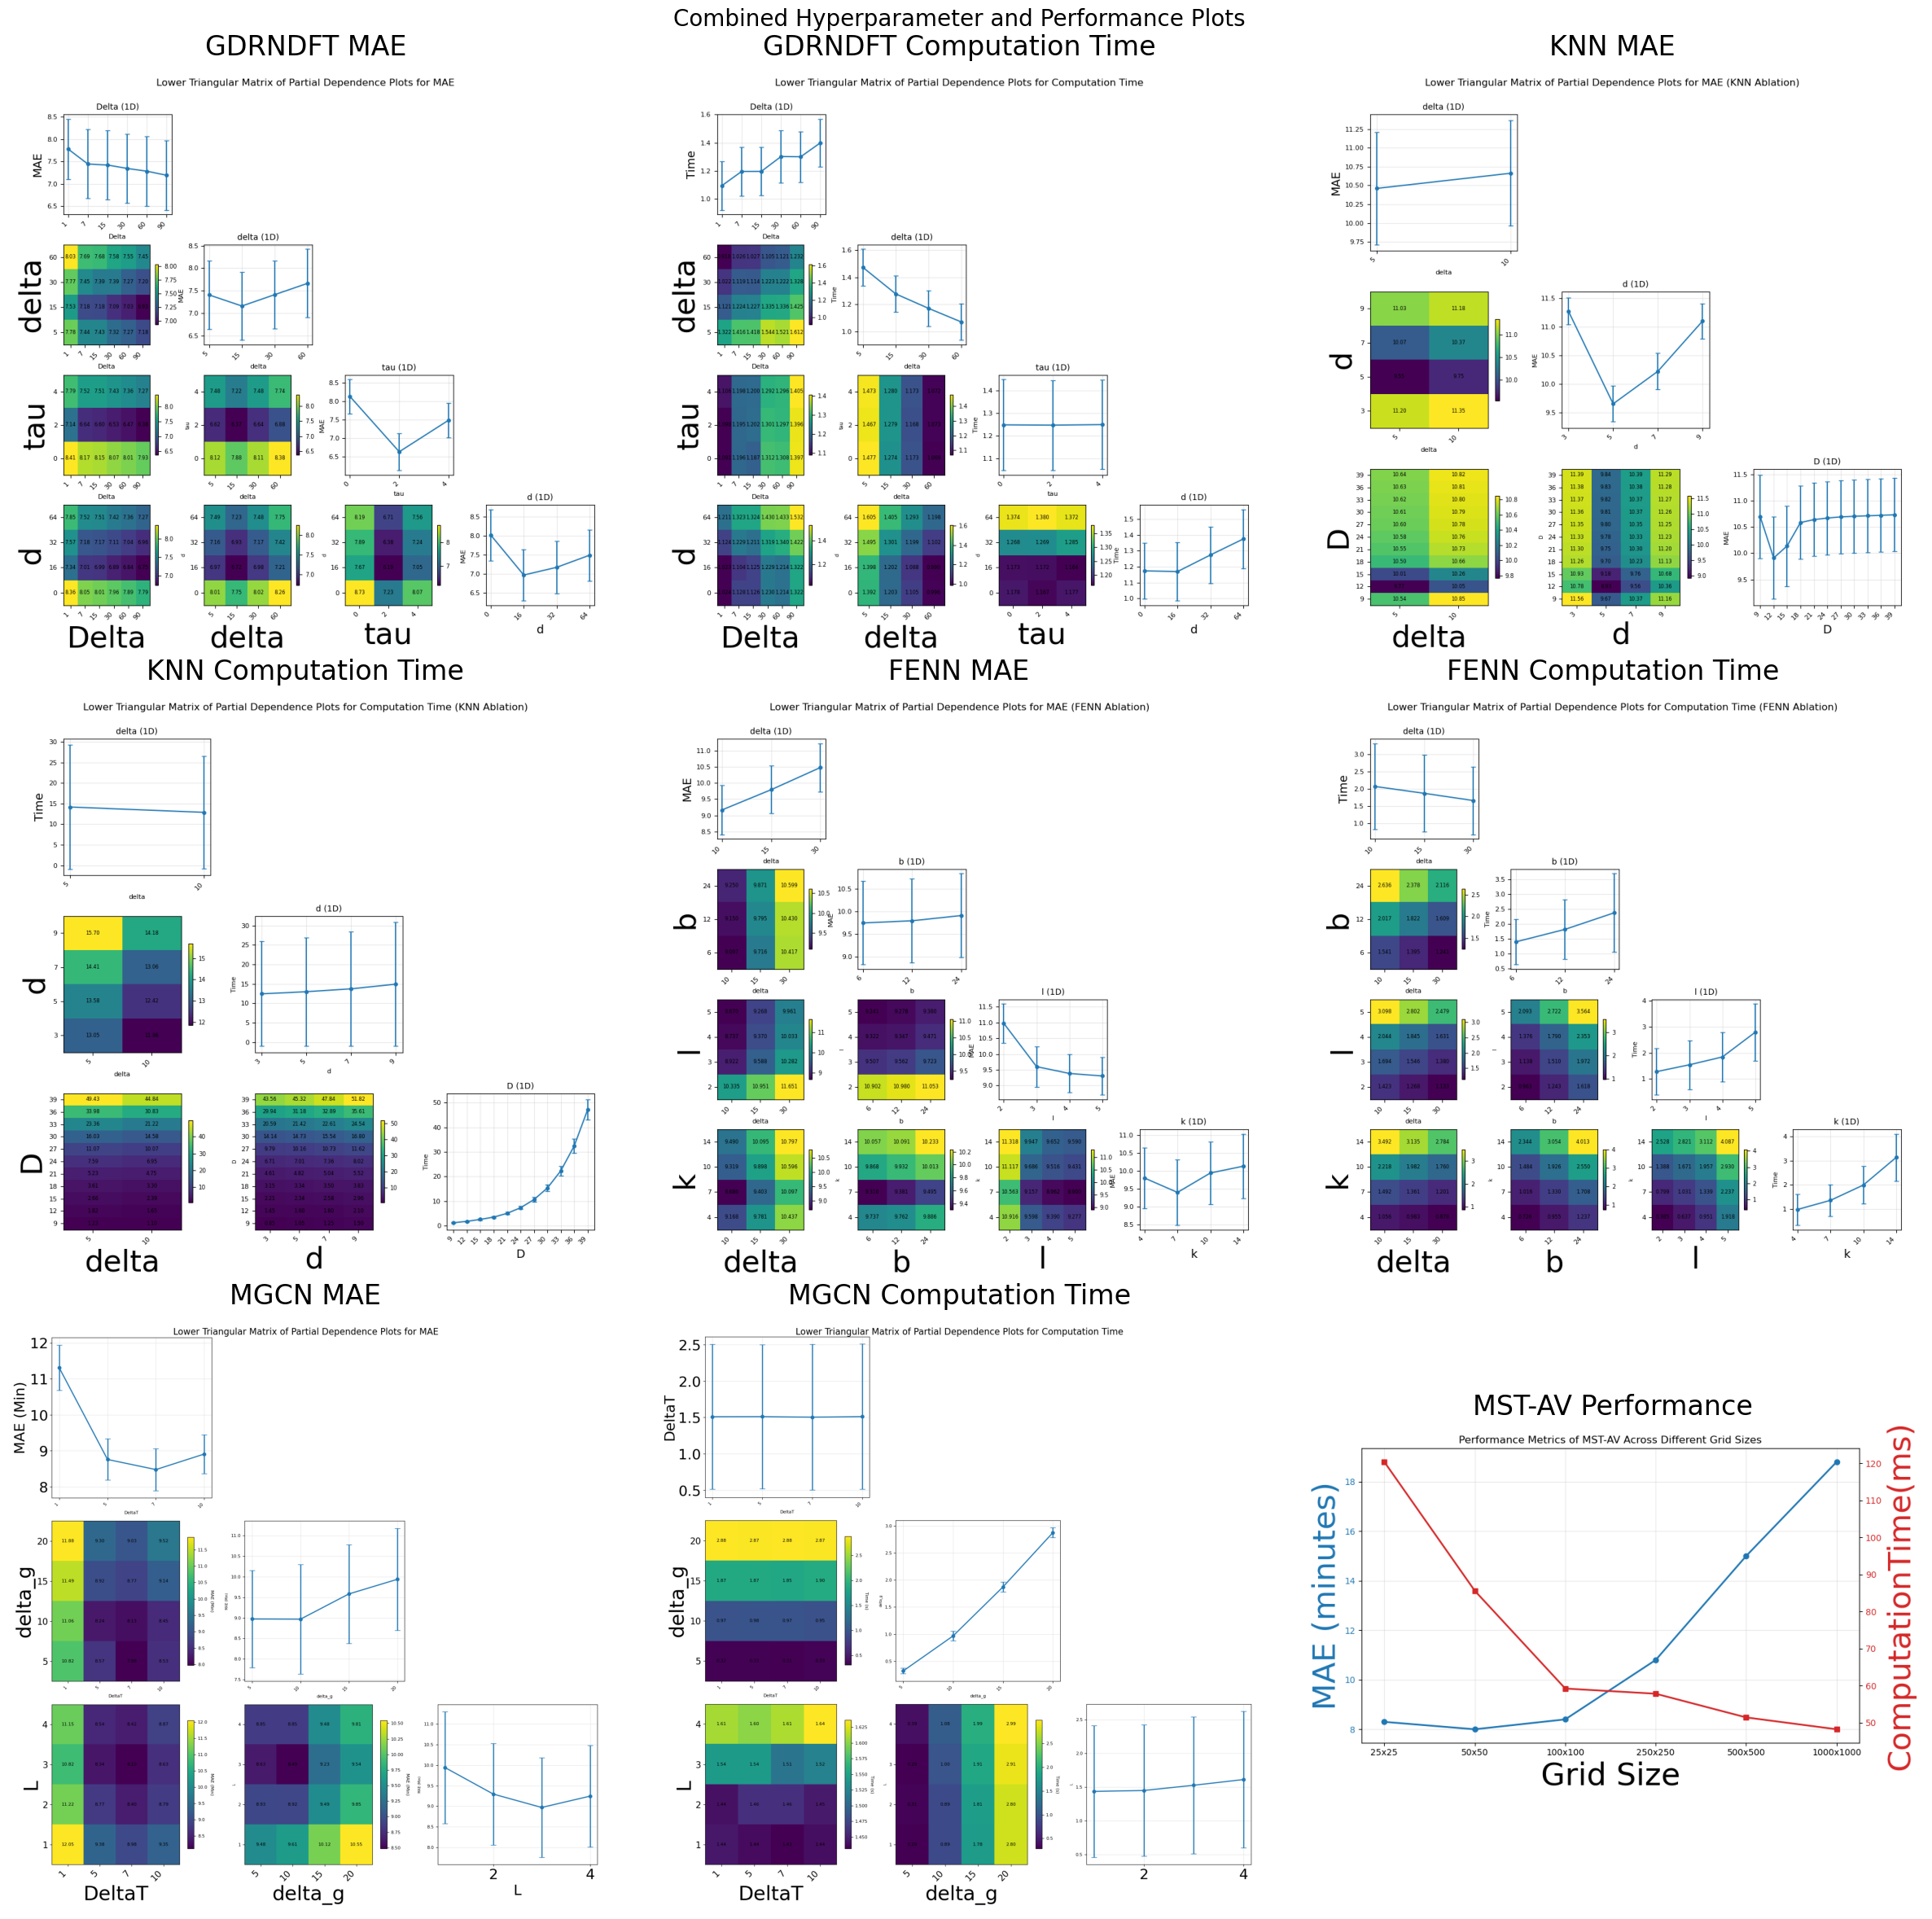

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# List of image file paths (assuming they are saved as PNG in the current directory)
image_files = [
    'interdependenceplot_mae_gdrndft1.png',      # 0: GDRNDFT MAE
    'interdependenceplot_time_gdrndft1.png',     # 1: GDRNDFT Time
    'interdependenceplot_mae_knn.png',           # 2: KNN MAE
    'interdependenceplot_time_knn.png',          # 3: KNN Time
    'interdependenceplot_mae_fenn.png',          # 4: FENN MAE
    'interdependenceplot_time_fenn.png',         # 5: FENN Time
    'interdependenceplot_mae_Mgcn.png',          # 6: MGCN MAE
    'interdependenceplot_computation_time_Mgcn.png', # 7: MGCN Time
    'Plot_mst-av.png'                            # 8: MST-AV (add .png if not already)
]

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(24, 24))  # Large figure size for clarity
fig.suptitle('Combined Hyperparameter and Performance Plots', fontsize=20)

# Load and display each image in the grid (row-major order)
for idx, (ax, img_file) in enumerate(zip(axes.flat, image_files)):
    # Load the image
    img = mpimg.imread(img_file)
    
    # Display the image on the axis
    ax.imshow(img)
    ax.axis('off')  # Hide axes for clean look
    
    # Optional: Add a title for each subplot based on the plot
    titles = [
        'GDRNDFT MAE', 'GDRNDFT Computation Time', 'KNN MAE',
        'KNN Computation Time', 'FENN MAE', 'FENN Computation Time',
        'MGCN MAE', 'MGCN Computation Time', 'MST-AV Performance'
    ]
    ax.set_title(titles[idx], fontsize=24, pad=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.05, hspace=0.05)

# Save the combined figure
plt.savefig('combined_3x3_plots.png', dpi=300, bbox_inches='tight')
plt.show()